In [1]:
####################  INIT : create the files

import numpy as np
import sh
import sys
import os
import csv
import glob

def main():
    # mp3_dir = "mp3"

    feature_dir = "feature"
    model_dir = "model"
    prediction_wav_dir = "prediction_wav"
    read_dir = "read"
    padding_dir = "padding"
    redimension_dir = "redimension"
    window_dir = "window"
    sample_csv_dir = "sample_csv"
    wav_dir = "wav"
    dir_name = feature_dir +" "+ model_dir +" "+ prediction_wav_dir +" "+ read_dir +" "+ padding_dir +" "+ redimension_dir +" "+ sample_csv_dir  +" "+ wav_dir+" "+ window_dir
    sh.run("mkdir -p "+ dir_name)
    #sh.run("rm -rf "+str_name)

    # mp3_to_wav.run(mp3_file, wav_dir)
    wav_train__dir = wav_dir + "/" + "train"
    wav_prediction_dir = wav_dir + "/" + "prediction"
    csv_train_dir = sample_csv_dir + "/" + "train"
    csv_prediction_dir = sample_csv_dir + "/" + "prediction"
    redim_train_dir = redimension_dir+ "/" + "train"
    redim_test_dir = redimension_dir+ "/" +"test"
    sub_dir = wav_train__dir +" "+ wav_prediction_dir +" "+ csv_train_dir +" "+ csv_prediction_dir +" "+redim_train_dir +" "+redim_test_dir
    sh.run("mkdir -p "+ sub_dir)

    labels = []
    for i, f in enumerate(glob.glob(sample_csv_dir + os.sep +'*')):
        # print f
        for j,f_sub in enumerate(glob.glob(f + os.sep +'*.csv')):
            # print f_sub
            sample_file = f_sub
            with open(sample_file, 'rb') as csvfile:

            	reader = csv.reader(csvfile, delimiter=',', quotechar='|')

                for k, row in enumerate(reader):
                    labels.append(row[2])


    print np.unique(labels)
    for l in np.unique(labels):
        print l
        sh.run("mkdir -p "+ read_dir +"/"+ l)
        sh.run("mkdir -p "+ padding_dir +"/"+ l)
        # sh.run("mkdir -p "+ redimension_dir +"/"+ l)
        sh.run("mkdir -p "+ redim_train_dir +"/"+ l)
        sh.run("mkdir -p "+ redim_test_dir +"/"+ l)
        sh.run("mkdir -p "+ prediction_wav_dir +"/"+ l)


if __name__ == '__main__':
	main()

mkdir -p feature model prediction_wav read padding redimension sample_csv wav window
mkdir -p wav/train wav/prediction sample_csv/train sample_csv/prediction redimension/train redimension/test
['Ba' 'Bm' 'Eg']
Ba
mkdir -p read/Ba
mkdir -p padding/Ba
mkdir -p redimension/train/Ba
mkdir -p redimension/test/Ba
mkdir -p prediction_wav/Ba
Bm
mkdir -p read/Bm
mkdir -p padding/Bm
mkdir -p redimension/train/Bm
mkdir -p redimension/test/Bm
mkdir -p prediction_wav/Bm
Eg
mkdir -p read/Eg
mkdir -p padding/Eg
mkdir -p redimension/train/Eg
mkdir -p redimension/test/Eg
mkdir -p prediction_wav/Eg


In [5]:
##############   cut audio with csv

from datetime import datetime, timedelta, tzinfo
import sys
import numpy as np
import os
import csv
import glob
import sh

class FixedOffset(tzinfo):
    """offset_str: Fixed offset in str: e.g. '-0400'"""
    def __init__(self, offset_str):
        sign, hours, minutes = offset_str[0], offset_str[1:3], offset_str[3:]
        offset = (int(hours) * 60 + int(minutes)) * (-1 if sign == "-" else 1)
        self.__offset = timedelta(minutes=offset)
        # NOTE: the last part is to remind about deprecated POSIX GMT+h timezones
        # that have the opposite sign in the name;
        # the corresponding numeric value is not used e.g., no minutes
        '<%+03d%02d>%+d' % (int(hours), int(minutes), int(hours)*-1)
    def utcoffset(self, dt=None):
        return self.__offset
    def tzname(self, dt=None):
        return self.__name
    def dst(self, dt=None):
        return timedelta(0)
    def __repr__(self):
        return 'FixedOffset(%d)' % (self.utcoffset().total_seconds() / 60)

def read(csv_train_dir):
    segProjet = []
    segSite = []
    segStart = []
    #segEnd = []
    segLabel = []
    duration = []
    segQuality = []
    for j,sample_file in enumerate(glob.glob(csv_train_dir + os.sep +'*.csv')):
#         print sample_file
        with open(sample_file, 'rb') as csvfile:
            reader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for j, row in enumerate(reader):
                segProjet.append(row[0])
                segSite.append(row[1])
                date_with_tz = row[3]
                #print date_with_tz

                start = datetime.strptime(date_with_tz, "%Y-%m-%dT%H:%M:%S.%f")

                #start = datetime.datetime.strptime(row[3], "%Y-%m-%dT%H:%M:%S")
                segStart.append(start)
                #segEnd.append(row[4])
                end = datetime.strptime(row[4], "%Y-%m-%dT%H:%M:%S.%f")
                segLabel.append(row[2])
                dur = (end - start).total_seconds()
                duration.append(dur)

                segQuality.append(row[5])
                #print dur
        #print segProjet,segSite,segStart,duration,segLabel,segQuality

    return segProjet,segSite,segStart,duration,segLabel,segQuality

def date_type(wav_dir,segProjet,segSite,segStart,duration,segLabel,segQuality,read_dir):
    print max(duration)
    print min(duration)
    for i, f in enumerate(glob.glob(wav_dir + os.sep +'*.wav')):               # for each WAV file
        wavFile = f
#         print os.path.splitext(wavFile)[0]
        waveFile_name = (os.path.splitext(wavFile)[0]).split(os.sep)[2]
#         print waveFile_name
        date1 = waveFile_name.split("_")[3]
        date2 = (waveFile_name.split("_")[4]).split(".")[0]
        #print date1,date2
        temp1 = []
        temp2 = []
        for i in range(len(date1)):
            #print date1[i], '(%d)' %i
            temp1.append(date1[i])
        date1 = "20" + temp1[0] + temp1[1] +"-"+ temp1[2] + temp1[3] +"-"+ temp1[4]+temp1[5]
#         print ("date1 is ",date1)

        for j in range(len(date2)):
            #print date2[j], '(%d)' %j
            temp2.append(date2[j])
        date2 = temp2[0] + temp2[1] +":"+ temp2[2] + temp2[3] +":"+ temp2[4]+temp2[5]
        #print date2

        date_str = date1 +" "+ date2
        #print data_str

        start_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

#         print ("start_date is ",start_date)
        
        cut(wavFile, segProjet,segSite,segStart,duration,segLabel,segQuality, read_dir,start_date)


        
def cut(wavFile,segProjet,segSite,segStart,duration,segLabel,segQuality, read_dir,start_date):
    # date2 = datetime.strptime(date2, "%H:%M:%S")
    #print("date2 is ",date2)
    cmd = """ffmpeg -i """ + wavFile + """ 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'"""
    rs = sh.run(cmd, True)

    duration_in_wavFile = rs.stdout()
#     print("the duration of wavfile is ", duration_in_wavFile)
    # print type(duration_in_wavFile)
    # print type(duration)

    w = os.path.splitext(wavFile)[0]
    projet_wav = w.split("_")[0]
    site_wav = w.split("_")[1]

    good_projet = []
    good_site = []
    good_species = []
    good_start = []
    good_cut_point = []
    good_duration = []
    good_quality = []
    for i in range(0, len(segStart)):
        if i < len(segStart) - 1:
            cut_point = (segStart[i] - start_date).total_seconds()
            #print cut_point
            #print type(cut_point)

            if cut_point >= 0 and float(cut_point) <= float(duration_in_wavFile):
                good_projet.append(segProjet[i])
                good_site.append(segSite[i])
                good_species.append(segLabel[i])

                temp_start = segStart[i].strftime("%Y-%m-%dT%H:%M:%S.%f")
                temp_start = temp_start[:-5]
                good_start.append(temp_start)

                good_cut_point.append(cut_point)
                good_duration.append(duration[i])
                good_quality.append(segQuality[i])
#     print good_cut_point,str(good_duration)
#     print good_start
    encode_good_speices = np.unique(good_species)
    for j in range(0,len(good_cut_point)):
        str_name = str(good_projet[j]) +"_"+ str(good_site[j]) +"_"+ str(good_start[j]) +"."+ str(good_species[j]) +"."+ str(good_quality[j])
        for s in encode_good_speices:
            if str(good_species[j]) == s and str(good_projet[j]==projet_wav) and str(good_site[j])==site_wav:
                cmd = "ffmpeg -ss " + str(good_cut_point[j]) + " -t " + str(good_duration[j])+ " -i " + wavFile + " " + read_dir + "/" + s + "/" + str_name + ".wav"
                sh.run(cmd)        
        
def clean(file_dir):
    for i, f in enumerate(glob.glob(file_dir + os.sep +'*')):
        # print f
        cmd = "rm -rf " + f  + "/*.wav"
        sh.run(cmd)

if __name__ == '__main__':

    csv_train_dir = "sample_csv/train"

    wav_dir = 'wav/train'
    read_dir = "read"
    clean(read_dir)
    segProjet,segSite,segStart,duration,segLabel,segQuality = read(csv_train_dir)
    date_type(wav_dir,segProjet,segSite,segStart,duration,segLabel,segQuality,read_dir)

rm -rf read/Bm/*.wav
rm -rf read/Eg/*.wav
rm -rf read/Ba/*.wav
43.1
1.0
ffmpeg -i wav/train/WAT_HZ_01_160124_170000.df100.x.wav 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'
ffmpeg -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'
ffmpeg -ss 139.1 -t 8.2 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T00:02:19.1.Bm.good.wav
ffmpeg -ss 204.3 -t 6.2 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T00:03:24.3.Bm.good.wav
ffmpeg -ss 273.6 -t 7.0 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T00:04:33.6.Bm.good.wav
ffmpeg -ss 336.6 -t 5.2 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T00:05:36.6.Bm.good.wav
ffmpeg -ss 397.9 -t 4.4 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-

ffmpeg -ss 6198.7 -t 5.4 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:43:18.7.Bm.good.wav
ffmpeg -ss 6208.5 -t 6.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:43:28.5.Bm.good.wav
ffmpeg -ss 6233.6 -t 2.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:43:53.6.Bm.good.wav
ffmpeg -ss 6444.7 -t 4.6 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:47:24.7.Bm.poor.wav
ffmpeg -ss 6527.8 -t 5.5 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:48:47.8.Bm.good.wav
ffmpeg -ss 6609.7 -t 5.4 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:50:09.7.Bm.good.wav
ffmpeg -ss 6671.6 -t 3.5 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:51:11.6.Bm.good.wav
ffmpeg -ss 6740.0 -t 3.5 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T01:52:20.0.Bm.poor.wav
ffmpeg -ss 6802.

ffmpeg -ss 11784.9 -t 3.9 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:16:24.9.Bm.good.wav
ffmpeg -ss 11840.6 -t 7.2 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:17:20.6.Bm.good.wav
ffmpeg -ss 11902.2 -t 4.4 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:18:22.2.Bm.good.wav
ffmpeg -ss 11912.7 -t 4.9 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:18:32.7.Bm.good.wav
ffmpeg -ss 12145.5 -t 3.6 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:22:25.5.Bm.poor.wav
ffmpeg -ss 12277.1 -t 5.4 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:24:37.1.Bm.poor.wav
ffmpeg -ss 12344.5 -t 3.6 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:25:44.5.Bm.good.wav
ffmpeg -ss 12410.1 -t 3.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T03:26:50.1.Bm.good.wav
ffmpeg -

ffmpeg -ss 24930.9 -t 6.1 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T06:55:30.9.Bm.good.wav
ffmpeg -ss 25056.3 -t 2.1 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T06:57:36.3.Bm.good.wav
ffmpeg -ss 25070.2 -t 8.2 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T06:57:50.2.Bm.good.wav
ffmpeg -ss 25125.4 -t 7.9 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T06:58:45.4.Bm.good.wav
ffmpeg -ss 25138.5 -t 5.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T06:58:58.5.Bm.good.wav
ffmpeg -ss 25203.5 -t 17.6 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T07:00:03.5.Bm.good.wav
ffmpeg -ss 25285.5 -t 8.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T07:01:25.5.Bm.good.wav
ffmpeg -ss 25351.9 -t 6.3 -i wav/train/WAT_HZ_01_160217_000000.df100.x.wav read/Bm/WAT_HZ_2016-02-17T07:02:31.9.Bm.good.wav
ffmpeg 

ffmpeg -ss 48483.3 -t 5.9 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T03:56:48.3.Bm.poor.wav
ffmpeg -ss 48763.9 -t 3.2 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:01:28.9.Bm.poor.wav
ffmpeg -ss 48829.3 -t 5.5 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:02:34.3.Bm.poor.wav
ffmpeg -ss 48971.6 -t 4.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:04:56.6.Bm.poor.wav
ffmpeg -ss 49033.3 -t 7.7 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:05:58.3.Bm.poor.wav
ffmpeg -ss 49103.5 -t 5.8 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:07:08.5.Bm.poor.wav
ffmpeg -ss 49170.3 -t 7.2 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:08:15.3.Bm.poor.wav
ffmpeg -ss 49241.2 -t 3.5 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T04:09:26.2.Bm.poor.wav
ffmpeg -ss 49308.2 -t 5.8 -i wav

ffmpeg -ss 88099.4 -t 3.4 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T14:57:04.4.Bm.poor.wav
ffmpeg -ss 94744.1 -t 2.1 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T16:47:49.1.Bm.poor.wav
ffmpeg -ss 100642.8 -t 3.9 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:26:07.8.Bm.poor.wav
ffmpeg -ss 100658.5 -t 2.5 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:26:23.5.Bm.poor.wav
ffmpeg -ss 100673.2 -t 1.8 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:26:38.2.Bm.poor.wav
ffmpeg -ss 101358.9 -t 3.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:38:03.9.Bm.poor.wav
ffmpeg -ss 101561.2 -t 6.3 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:41:26.2.Bm.good.wav
ffmpeg -ss 101631.3 -t 4.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-24T18:42:36.3.Bm.poor.wav
ffmpeg -ss 102207.0 -t 3.7

ffmpeg -ss 157021.6 -t 6.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T10:05:46.6.Bm.good.wav
ffmpeg -ss 158596.3 -t 4.3 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T10:32:01.3.Bm.poor.wav
ffmpeg -ss 158667.1 -t 5.8 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T10:33:12.1.Bm.poor.wav
ffmpeg -ss 158992.1 -t 8.8 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T10:38:37.1.Bm.poor.wav
ffmpeg -ss 159204.3 -t 7.5 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T10:42:09.3.Bm.poor.wav
ffmpeg -ss 160342.7 -t 5.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T11:01:07.7.Bm.poor.wav
ffmpeg -ss 162940.8 -t 7.1 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T11:44:25.8.Bm.poor.wav
ffmpeg -ss 163011.1 -t 5.3 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-25T11:45:36.1.Bm.poor.wav
ffmpeg -ss 164071.3 -t 5

ffmpeg -ss 326206.5 -t 5.0 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:05:31.5.Bm.poor.wav
ffmpeg -ss 326215.2 -t 2.6 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:05:40.2.Bm.good.wav
ffmpeg -ss 326230.0 -t 2.4 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:05:55.0.Bm.good.wav
ffmpeg -ss 326258.3 -t 2.0 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:06:23.3.Bm.poor.wav
ffmpeg -ss 326266.9 -t 2.3 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:06:31.9.Bm.good.wav
ffmpeg -ss 326281.5 -t 2.4 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:06:46.5.Bm.good.wav
ffmpeg -ss 326296.0 -t 3.0 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:07:01.0.Bm.good.wav
ffmpeg -ss 326312.1 -t 6.2 -i wav/train/HAT_A_02_121023_142845.d100.x.wav read/Bm/HAT_A_2012-10-27T09:07:17.1.Bm.good.wav
ffmpeg -ss 327134.8 -t 1

ffmpeg -ss 9016.7 -t 6.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:30:16.7.Bm.poor.wav
ffmpeg -ss 9032.0 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:30:32.0.Bm.poor.wav
ffmpeg -ss 9095.3 -t 5.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:31:35.3.Bm.good.wav
ffmpeg -ss 9108.9 -t 3.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:31:48.9.Bm.poor.wav
ffmpeg -ss 9172.4 -t 5.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:32:52.4.Bm.poor.wav
ffmpeg -ss 9314.7 -t 2.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:35:14.7.Bm.poor.wav
ffmpeg -ss 9325.6 -t 4.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:35:25.6.Bm.poor.wav
ffmpeg -ss 9474.9 -t 2.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T02:37:54.9.Bm.poor.wav
ffmpeg -ss 9535.

ffmpeg -ss 15199.3 -t 2.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:13:19.3.Bm.good.wav
ffmpeg -ss 15264.9 -t 3.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:14:24.9.Bm.good.wav
ffmpeg -ss 15326.0 -t 5.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:15:26.0.Bm.good.wav
ffmpeg -ss 15389.1 -t 5.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:16:29.1.Bm.good.wav
ffmpeg -ss 15404.7 -t 1.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:16:44.7.Bm.good.wav
ffmpeg -ss 15466.9 -t 3.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:17:46.9.Bm.good.wav
ffmpeg -ss 15535.4 -t 2.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:18:55.4.Bm.good.wav
ffmpeg -ss 15594.5 -t 5.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T04:19:54.5.Bm.poor.wav
ffmpeg -

ffmpeg -ss 20837.8 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:47:17.8.Bm.poor.wav
ffmpeg -ss 20851.6 -t 3.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:47:31.6.Bm.poor.wav
ffmpeg -ss 20967.7 -t 5.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:49:27.7.Bm.poor.wav
ffmpeg -ss 21113.7 -t 5.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:51:53.7.Bm.poor.wav
ffmpeg -ss 21398.6 -t 4.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:56:38.6.Bm.poor.wav
ffmpeg -ss 21412.9 -t 5.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:56:52.9.Bm.poor.wav
ffmpeg -ss 21465.8 -t 7.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:57:45.8.Bm.poor.wav
ffmpeg -ss 21474.2 -t 5.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T05:57:54.2.Bm.good.wav
ffmpeg -

ffmpeg -ss 26023.0 -t 6.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:13:43.0.Bm.good.wav
ffmpeg -ss 26034.9 -t 2.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:13:54.9.Bm.poor.wav
ffmpeg -ss 26087.1 -t 5.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:14:47.1.Bm.good.wav
ffmpeg -ss 26102.5 -t 2.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:15:02.5.Bm.good.wav
ffmpeg -ss 26164.4 -t 4.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:16:04.4.Bm.good.wav
ffmpeg -ss 26179.3 -t 1.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:16:19.3.Bm.good.wav
ffmpeg -ss 26241.6 -t 5.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:17:21.6.Bm.poor.wav
ffmpeg -ss 26306.0 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T07:18:26.0.Bm.poor.wav
ffmpeg -

ffmpeg -ss 29874.5 -t 2.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:17:54.5.Bm.good.wav
ffmpeg -ss 29908.9 -t 7.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:18:28.9.Bm.poor.wav
ffmpeg -ss 29957.8 -t 7.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:19:17.8.Bm.poor.wav
ffmpeg -ss 29981.7 -t 6.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:19:41.7.Bm.poor.wav
ffmpeg -ss 30022.5 -t 4.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:20:22.5.Bm.poor.wav
ffmpeg -ss 30035.9 -t 3.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:20:35.9.Bm.poor.wav
ffmpeg -ss 30102.0 -t 2.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:21:42.0.Bm.poor.wav
ffmpeg -ss 30113.8 -t 2.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-02T08:21:53.8.Bm.good.wav
ffmpeg -

ffmpeg -ss 90077.0 -t 2.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:01:17.0.Bm.poor.wav
ffmpeg -ss 90749.3 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:12:29.3.Bm.poor.wav
ffmpeg -ss 90889.9 -t 3.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:14:49.9.Bm.good.wav
ffmpeg -ss 90967.7 -t 3.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:16:07.7.Bm.good.wav
ffmpeg -ss 91046.4 -t 2.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:17:26.4.Bm.poor.wav
ffmpeg -ss 91111.4 -t 2.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:18:31.4.Bm.poor.wav
ffmpeg -ss 91188.9 -t 3.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:19:48.9.Bm.poor.wav
ffmpeg -ss 91400.6 -t 2.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T01:23:20.6.Bm.poor.wav
ffmpeg -

ffmpeg -ss 98397.1 -t 8.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:19:57.1.Bm.poor.wav
ffmpeg -ss 98414.2 -t 3.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:20:14.2.Bm.poor.wav
ffmpeg -ss 98450.4 -t 2.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:20:50.4.Bm.poor.wav
ffmpeg -ss 98473.4 -t 7.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:21:13.4.Bm.good.wav
ffmpeg -ss 98489.0 -t 3.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:21:29.0.Bm.good.wav
ffmpeg -ss 98550.0 -t 8.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:22:30.0.Bm.good.wav
ffmpeg -ss 98565.7 -t 4.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:22:45.7.Bm.good.wav
ffmpeg -ss 98628.8 -t 7.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T03:23:48.8.Bm.good.wav
ffmpeg -

ffmpeg -ss 102480.9 -t 5.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:28:00.9.Bm.good.wav
ffmpeg -ss 102546.2 -t 8.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:29:06.2.Bm.good.wav
ffmpeg -ss 102613.4 -t 7.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:30:13.4.Bm.good.wav
ffmpeg -ss 102628.4 -t 4.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:30:28.4.Bm.good.wav
ffmpeg -ss 102693.3 -t 5.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:31:33.3.Bm.good.wav
ffmpeg -ss 102704.7 -t 6.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:31:44.7.Bm.good.wav
ffmpeg -ss 102828.6 -t 8.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:33:48.6.Bm.good.wav
ffmpeg -ss 102896.0 -t 6.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T04:34:56.0.Bm.good.wav


ffmpeg -ss 110840.5 -t 5.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:47:20.5.Bm.good.wav
ffmpeg -ss 110855.1 -t 3.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:47:35.1.Bm.good.wav
ffmpeg -ss 110919.2 -t 3.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:48:39.2.Bm.good.wav
ffmpeg -ss 110931.7 -t 4.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:48:51.7.Bm.good.wav
ffmpeg -ss 110974.9 -t 4.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:49:34.9.Bm.poor.wav
ffmpeg -ss 110998.0 -t 4.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:49:58.0.Bm.good.wav
ffmpeg -ss 111064.6 -t 3.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:51:04.6.Bm.good.wav
ffmpeg -ss 111077.2 -t 4.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T06:51:17.2.Bm.good.wav


ffmpeg -ss 114512.4 -t 6.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T07:48:32.4.Bm.poor.wav
ffmpeg -ss 115117.0 -t 4.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T07:58:37.0.Bm.poor.wav
ffmpeg -ss 115188.5 -t 5.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T07:59:48.5.Bm.poor.wav
ffmpeg -ss 120519.7 -t 4.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T09:28:39.7.Bm.poor.wav
ffmpeg -ss 123794.8 -t 7.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T10:23:14.8.Bm.poor.wav
ffmpeg -ss 123872.7 -t 8.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T10:24:32.7.Bm.poor.wav
ffmpeg -ss 129684.1 -t 2.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T12:01:24.1.Bm.good.wav
ffmpeg -ss 129697.1 -t 2.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T12:01:37.1.Bm.good.wav


ffmpeg -ss 165342.7 -t 2.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T21:55:42.7.Bm.poor.wav
ffmpeg -ss 165386.2 -t 4.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T21:56:26.2.Bm.good.wav
ffmpeg -ss 165462.6 -t 5.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T21:57:42.6.Bm.poor.wav
ffmpeg -ss 165473.3 -t 5.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T21:57:53.3.Bm.poor.wav
ffmpeg -ss 165536.0 -t 5.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T21:58:56.0.Bm.good.wav
ffmpeg -ss 165612.2 -t 4.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T22:00:12.2.Bm.good.wav
ffmpeg -ss 165620.6 -t 3.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T22:00:20.6.Bm.poor.wav
ffmpeg -ss 165643.3 -t 9.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-03T22:00:43.3.Bm.poor.wav


ffmpeg -ss 173212.6 -t 3.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:06:52.6.Bm.poor.wav
ffmpeg -ss 173264.5 -t 6.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:07:44.5.Bm.poor.wav
ffmpeg -ss 173283.2 -t 2.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:08:03.2.Bm.poor.wav
ffmpeg -ss 173335.6 -t 9.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:08:55.6.Bm.poor.wav
ffmpeg -ss 173351.8 -t 5.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:09:11.8.Bm.poor.wav
ffmpeg -ss 173407.7 -t 7.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:10:07.7.Bm.poor.wav
ffmpeg -ss 173479.9 -t 8.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:11:19.9.Bm.poor.wav
ffmpeg -ss 173498.0 -t 8.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T00:11:38.0.Bm.poor.wav


ffmpeg -ss 177276.4 -t 4.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:14:36.4.Bm.poor.wav
ffmpeg -ss 177337.5 -t 8.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:15:37.5.Bm.poor.wav
ffmpeg -ss 177415.5 -t 4.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:16:55.5.Bm.poor.wav
ffmpeg -ss 177514.5 -t 3.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:18:34.5.Bm.poor.wav
ffmpeg -ss 177573.8 -t 3.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:19:33.8.Bm.poor.wav
ffmpeg -ss 177640.1 -t 9.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:20:40.1.Bm.poor.wav
ffmpeg -ss 177708.0 -t 5.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:21:48.0.Bm.poor.wav
ffmpeg -ss 177773.9 -t 4.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T01:22:53.9.Bm.poor.wav


ffmpeg -ss 180680.4 -t 6.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:11:20.4.Bm.good.wav
ffmpeg -ss 180743.1 -t 8.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:12:23.1.Bm.good.wav
ffmpeg -ss 180757.5 -t 7.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:12:37.5.Bm.good.wav
ffmpeg -ss 180820.4 -t 7.7 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:13:40.4.Bm.good.wav
ffmpeg -ss 180836.5 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:13:56.5.Bm.good.wav
ffmpeg -ss 180866.8 -t 8.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:14:26.8.Bm.poor.wav
ffmpeg -ss 180897.9 -t 7.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:14:57.9.Bm.good.wav
ffmpeg -ss 180913.4 -t 7.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T02:15:13.4.Bm.good.wav


ffmpeg -ss 188794.9 -t 8.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:26:34.9.Bm.poor.wav
ffmpeg -ss 188866.2 -t 8.2 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:27:46.2.Bm.good.wav
ffmpeg -ss 188937.1 -t 8.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:28:57.1.Bm.poor.wav
ffmpeg -ss 189007.6 -t 8.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:30:07.6.Bm.poor.wav
ffmpeg -ss 189078.0 -t 8.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:31:18.0.Bm.poor.wav
ffmpeg -ss 189151.0 -t 7.8 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:32:31.0.Bm.poor.wav
ffmpeg -ss 189220.0 -t 10.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:33:40.0.Bm.poor.wav
ffmpeg -ss 189293.5 -t 6.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T04:34:53.5.Bm.poor.wav

ffmpeg -ss 195645.0 -t 4.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:20:45.0.Bm.poor.wav
ffmpeg -ss 195656.3 -t 6.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:20:56.3.Bm.poor.wav
ffmpeg -ss 195714.8 -t 11.6 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:21:54.8.Bm.poor.wav
ffmpeg -ss 195856.9 -t 8.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:24:16.9.Bm.poor.wav
ffmpeg -ss 195927.9 -t 5.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:25:27.9.Bm.poor.wav
ffmpeg -ss 196023.4 -t 5.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:27:03.4.Bm.poor.wav
ffmpeg -ss 196071.9 -t 5.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:27:51.9.Bm.poor.wav
ffmpeg -ss 196357.3 -t 6.3 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T06:32:37.3.Bm.poor.wav

ffmpeg -ss 208844.0 -t 4.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:00:44.0.Bm.poor.wav
ffmpeg -ss 208983.5 -t 8.5 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:03:03.5.Bm.poor.wav
ffmpeg -ss 209051.9 -t 8.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:04:11.9.Bm.poor.wav
ffmpeg -ss 209126.0 -t 6.0 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:05:26.0.Bm.poor.wav
ffmpeg -ss 209239.8 -t 6.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:07:19.8.Bm.good.wav
ffmpeg -ss 209382.9 -t 5.1 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:09:42.9.Bm.good.wav
ffmpeg -ss 209725.1 -t 8.9 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:15:25.1.Bm.poor.wav
ffmpeg -ss 209796.1 -t 7.4 -i wav/train/WAT_BP_01_161002_000000.df100.x.wav read/Bm/WAT_BP_2016-10-04T10:16:36.1.Bm.poor.wav


ffmpeg -ss 20313.2 -t 1.4 -i wav/train/WAT_NC_01_150520_000000.df100.x.wav read/Eg/WAT_NC_2015-05-20T05:38:33.2.Eg.poor.wav
ffmpeg -ss 15913.4 -t 2.1 -i wav/train/WAT_NC_01_150520_000000.df100.x.wav read/Eg/WAT_NC_2015-05-20T04:25:13.4.Eg.poor.wav
ffmpeg -ss 15940.1 -t 1.8 -i wav/train/WAT_NC_01_150520_000000.df100.x.wav read/Eg/WAT_NC_2015-05-20T04:25:40.1.Eg.poor.wav
ffmpeg -ss 16103.4 -t 2.2 -i wav/train/WAT_NC_01_150520_000000.df100.x.wav read/Eg/WAT_NC_2015-05-20T04:28:23.4.Eg.poor.wav
ffmpeg -i wav/train/HAT_A_02_121021_000000.d100.x.wav 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'
ffmpeg -ss 16451.2 -t 8.1 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-21T04:34:11.2.Bm.poor.wav
ffmpeg -ss 17111.8 -t 4.3 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-21T04:45:11.8.Bm.poor.wav
ffmpeg -ss 19248.3 -t 2.3 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-

ffmpeg -ss 97654.2 -t 4.3 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:07:34.2.Bm.good.wav
ffmpeg -ss 97944.1 -t 5.6 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:12:24.1.Bm.good.wav
ffmpeg -ss 98266.3 -t 3.5 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:17:46.3.Bm.poor.wav
ffmpeg -ss 98398.2 -t 9.0 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:19:58.2.Bm.good.wav
ffmpeg -ss 98473.3 -t 6.4 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:21:13.3.Bm.good.wav
ffmpeg -ss 98693.8 -t 2.5 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:24:53.8.Bm.poor.wav
ffmpeg -ss 98766.0 -t 3.3 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:26:06.0.Bm.poor.wav
ffmpeg -ss 98873.5 -t 5.4 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-22T03:27:53.5.Bm.poor.wav
ffmpeg -ss 98945.6 -t 1.9 -i wav

ffmpeg -ss 178361.1 -t 2.4 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T01:32:41.1.Bm.poor.wav
ffmpeg -ss 183821.0 -t 4.4 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:03:41.0.Bm.poor.wav
ffmpeg -ss 184646.7 -t 6.3 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:17:26.7.Bm.good.wav
ffmpeg -ss 184953.5 -t 5.8 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:22:33.5.Bm.good.wav
ffmpeg -ss 185113.4 -t 4.0 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:25:13.4.Bm.poor.wav
ffmpeg -ss 186248.1 -t 6.0 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:44:08.1.Bm.poor.wav
ffmpeg -ss 186323.9 -t 4.4 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T03:45:23.9.Bm.poor.wav
ffmpeg -ss 191067.2 -t 3.6 -i wav/train/HAT_A_02_121021_000000.d100.x.wav read/Bm/HAT_A_2012-10-23T05:04:27.2.Bm.poor.wav
ffmpeg -ss 193899.0 -t 3

In [ ]:
### padding and ensure all the audio has same length

import librosa
import util
import numpy as np
import sys
import os
import glob
import sh
import matplotlib.pyplot as plt


def padding_audio(data,fs,T):
    # Calculate target number of samples
    N_tar = int(fs * T)
    # Calculate number of zero samples to append
    shape = data.shape
    # Create the target shape
    N_pad = N_tar - shape[0]
#     print("Padding with %f seconds of silence" % float(N_pad/fs))
    shape = (N_pad,) + shape[1:]
    # Stack only if there is something to append
    if shape[0] > 0:
        if len(shape) > 1:
            return np.vstack((data,np.zeros(shape)))
        else:
            return np.hstack((data,np.zeros(shape)))
    else:
        return data




def read_audio(read_dir,sub_dirs,T_total,padding_dir,labels):
    for k, sub_dir in enumerate(sub_dirs):
        #print("label: %s" % (label))
#         print("sub_dir: %s" % (sub_dir))
        for i, f in enumerate(glob.glob(read_dir + os.sep+ sub_dir + os.sep +'*.wav')):               # for each WAV file

            wavFile = f
#             print wavFile
            waveFile_name = (os.path.splitext(wavFile)[0]).split(os.sep)[2]
#             print waveFile_name
            quality = util.splitext(waveFile_name)[2]
#             print quality
            # Read the wav file
            in_data, fs = librosa.load(wavFile)

            #print("fs is ",fs)
            #print("data is ", in_data)
            #print os.path.splitext(wavFile)[0]


            cmd = """ffmpeg -i """ + wavFile + """ 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'"""
            rs = sh.run(cmd, True)

            duration_in_wavFile = rs.stdout()
#             print("the duration of wavfile is ", duration_in_wavFile)
#             print type(duration_in_wavFile)

            if float(T_total) >= float(duration_in_wavFile):
                out_data = padding_audio(in_data,fs,T_total)

                # Save the output file
                for l in labels:
                    if quality == l:
                        out_wav = padding_dir +"/"+ l +"/"+ waveFile_name +".wav"
                    # if quality == "Eg":
                    #     out_wav = result_padding_dir +"/"+ eg_padding_dir +"/" +waveFile_name+".wav"

                    librosa.output.write_wav(out_wav, out_data, fs)


            else:
                int_num = int(float(duration_in_wavFile) / T_total)+1
                number = float(duration_in_wavFile) % T_total
#                 print number,int_num
                if number != 0:
                    T = T_total*int_num
                    out_data = padding_audio(in_data,fs,T)
                    for l in labels:
                        if quality == l:
                            out_wav = padding_dir +"/"+ l +"/"+ waveFile_name +".wav"
                        # if quality == "Eg":
                        #     out_wav = result_padding_dir +"/"+ eg_padding_dir +"/" +waveFile_name+".wav"

                        librosa.output.write_wav(out_wav, out_data, fs)




def cut_padding_audio(padding_dir,sub_dirs,T_total,redimension_dir,labels):
    for k, sub_padding in enumerate(sub_dirs):
        #print("label: %s" % (label))
#         print("sub_padding: %s" % (sub_padding))
        for i, f in enumerate(glob.glob(padding_dir + os.sep + sub_padding + os.sep+'*.wav')):               # for each WAV file

            wavFile = f
#             print wavFile
            waveFile_name = (os.path.splitext(wavFile)[0]).split(os.sep)[2]
            quality = util.splitext(waveFile_name)[2]
#             print quality

            cmd = """ffmpeg -i """ + wavFile + """ 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'"""
            rs = sh.run(cmd, True)

            duration_in_wavFile = rs.stdout()
#             print("the duration of wavfile is ", duration_in_wavFile)
            int_num = int(float(duration_in_wavFile) / float(T_total))-1
#             print int_num
            cut_point = np.linspace(0,T_total*int_num,int_num+1)
#             print cut_point
            if float(duration_in_wavFile) > float(T_total):
                for j in range(0, len(cut_point)):
#                     print str(cut_point[j])
                    for l in labels:

                        if quality == l:
                            number = np.random.randint(0,9)
                            if number>2:
                                path_name = redimension_dir+"/"+"train" +"/"+ l +"/"
                            else:
                                path_name = redimension_dir+"/"+"test" +"/"+ l +"/"
                        # if quality == "Eg":
                        #     path_name = result_redimension_dir +"/"+ eg_redimension_dir +"/"

                    cmd = "ffmpeg -ss " + str(cut_point[j]) + " -t " + str(T_total)+ " -i " + wavFile + " " + path_name + waveFile_name +"_"+ str(j) + ".wav"
                    sh.run(cmd)
            else:
                for l in labels:
                    if quality == l:
                        number = np.random.randint(0,9)
                        if number>2:
                            path_name = redimension_dir+"/"+"train" +"/"+ l +"/"
                        else:
                            path_name = redimension_dir+"/"+"test" +"/"+ l +"/"
                    # if quality == "Eg":
                    #     path_name = result_redimension_dir +"/"+ eg_redimension_dir +"/"

                cmd = "cp " + wavFile +" "+ path_name
                sh.run(cmd)

def clean(file_dir):
    for i, f in enumerate(glob.glob(file_dir + os.sep +'*')):
        # print f
        cmd = "rm -rf " + f  + "/*.wav"
        sh.run(cmd)



if __name__ == "__main__":

    # wav_dir = "result_eg"
    read_dir = "read"
    padding_dir = "padding"
    redimension_dir = "redimension"
    redimension__train_dir = "redimension/train"
    redimension__test_dir = "redimension/test"
    labels = []
    T_total = 4
    sub_dirs = []
    for i, f in enumerate(glob.glob(read_dir + os.sep +'*')):
        f = os.path.splitext(f)[0]
        sub_dirs.append(f.split(os.sep)[1])
        labels.append(f.split(os.sep)[1])
#     print labels

    clean(padding_dir)
    clean(redimension__train_dir)
    clean(redimension__test_dir)
    read_audio(read_dir,sub_dirs,T_total,padding_dir,labels)
    cut_padding_audio(padding_dir,sub_dirs,T_total,redimension_dir,labels)
    clean(padding_dir)


In [3]:
### extract the features (mfcc, wavelet, raw signal)

import math
from sklearn import preprocessing
import pywt
import numpy as np
import sys
import os
import glob
import sh
import matplotlib.pyplot as plt
import util
import librosa


def  get_teager_energy(wp,Node,n,N_limit):
    k_len = 12
    TC = []
    for k in range(k_len):
        sum = 0
        for l in range(2**n):
            el = get_e(l,N_limit,wp,Node)
            sum += math.log(np.abs(el),2) * math.cos(k*(l-0.5)*math.pi/(2**n))
        TC.append(sum)
    return TC

def get_e(l,N_limit,wp,Node):
    name = Node[l]
    x = wp[name].data
    sum = 0
    for t in range(N_limit):

        sum += x[t+1]*x[t+1]-x[t]*x[t+2]
        #print sum
    el = float(sum/N_limit)
    return el

def extration_wavelet_packet(wavFile):

    sig, fs = librosa.load(wavFile)
#     print("fs is ",fs)
#     print("signal length is ", len(sig))
    N_signal = len(sig)
    n_level = 6

    wp = pywt.WaveletPacket(data=sig, wavelet='db3', mode='symmetric')

    Node = []
    N_limit = 16
    limit = 0
    for node in wp.get_level(6, 'natural'):
            Node.append(node.path)

#     print("sub sample is ",len(Node))

    TC = get_teager_energy(wp,Node,n_level,N_limit)
#     print ("TC is ",TC)
    return TC


def extration_mfcc(wavFile):

    # Read the wav file
    X, sample_rate = librosa.load(wavFile)
#     print("sample_rate  is ",sample_rate )
#     print("data is ", X)

    # sftf
#     stft = np.abs(librosa.stft(X))

    # mfcc
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
    '''
    # chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # melspectrogram
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    return mfccs,chroma,mel,contrast
    '''
    return mfccs

def extration_rawSignal(wavFile,max_len,sample_rate):

    # Read the wav file
    X, sample_rate = librosa.load(wavFile, sr=sample_rate, mono=True)
    # print("sample_rate  is ",sample_rate )
    # print("data is ", X)
    # print X.shape
    if X.shape[0] < max_len:
        pad = np.zeros(max_len - X.shape[0])
        # print("pad is ",pad)
        X = np.hstack((X, pad))
    elif X.shape[0] > max_len:
        X = X[:max_len]
    # print X.shape
    return X



def parse_audio_files_rawSignal(redimension_dir,sub_read,file_ext):
    max_len=200
    sample_rate=100
    features, labels = np.empty((0,max_len)), np.empty(0)
    for label, sub_dir in enumerate(sub_read):
#         print("label: %s" % (label))
        #print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(redimension_dir, sub_dir, file_ext)):
#             print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[2]
            try:
                audio = extration_rawSignal(f,max_len,sample_rate)

            except Exception as e:
#                 print("[Error] extract feature error. %s" % (e))
                continue

            ext_features = np.hstack([audio])
            #print len(ext_features)
            #print ext_features
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, quality)
            labels = np.append(labels, label)
        # print (features.shape)
        #print features
        #print labels
    return np.array(features), np.array(labels, dtype = np.int)


def parse_audio_files_waveletPackets(read_dir,sub_read,file_ext):
    features, labels = np.empty((0,12)), np.empty(0)
    for label, sub_dir in enumerate(sub_read):
#         print("label: %s" % (label))
        #print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(read_dir, sub_dir, file_ext)):
#             print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[2]
            quality = util.splitext(waveFile_name)[2]
            try:
                TC = extration_wavelet_packet(f)

            except Exception as e:
#                 print("[Error] extract feature error. %s" % (e))
                continue

            ext_features = np.hstack([TC])
            #print len(ext_features)
            #print ext_features
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, quality)
            labels = np.append(labels, label)
#         print (features.shape)
        #print features
        #print labels
    return np.array(features), np.array(labels, dtype = np.int)


def parse_audio_files_mfcc(read_dir,sub_read,file_ext):
    features, labels = np.empty((0,13)), np.empty(0)
    for label, sub_dir in enumerate(sub_read):
#         print("label: %s" % (label))
        #print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(read_dir, sub_dir, file_ext)):
#             print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[2]
            quality = util.splitext(waveFile_name)[2]
            try:
                mfccs = extration_mfcc(f)
                # print len(mfccs),len(chroma),len(mel),len(contrast)
#                 print (len(mfccs))
                #print ("mfcc is",np.array(mfccs))
            except Exception as e:
#                 print("[Error] extract feature error. %s" % (e))
                continue

            # ext_features = np.hstack([mfccs,chroma,mel,contrast])
            ext_features = np.hstack([mfccs])
            #print len(ext_features)
            #print ext_features
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, quality)
            labels = np.append(labels, label)
#         print (features.shape)
#         print (features)
        #print labels
    return np.array(features), np.array(labels, dtype = np.int)


def normaliser_features(features):

    features_normalisation = preprocessing.scale(features)

    return features_normalisation



def encode_label(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    labels_encode = np.zeros((n_labels,1))
    #print labels_encode
    for i in range(n_labels):
        labels_encode[i]= labels[i]

    return labels_encode


if __name__ == "__main__":

    read_dir = "read"
    sub_read = ['Bm','Eg']
    file_ext='*.wav'
    
#     cmd = "rm -rf feature/*"
#     sh.run(cmd)
    ############ mfcc
    print ("begin to extract features mfcc")
    features_mfcc,labels_mfcc = parse_audio_files_mfcc(read_dir,sub_read,file_ext)
    features_mfcc = normaliser_features(features_mfcc)
    # print ("features noramallisation are ",features_normalisation)
    labels_mfcc = encode_label(labels_mfcc)
    # print ("label encode is ",labels_encode)
    #print type(labels_encode)
   
    np.savetxt("feature/train_features_mfcc.txt",features_mfcc)
    np.savetxt("feature/train_label_mfcc.txt",labels_mfcc)
    print ("extract features mfcc ends")
    
    ############ wavelet
    print ("begin to extract features wavelet")
    features_wavelet,labels_wavelet = parse_audio_files_waveletPackets(read_dir,sub_read,file_ext)
    features_wavelet = normaliser_features(features_wavelet)
    labels_wavelet = encode_label(labels_wavelet)

    np.savetxt("feature/train_features_wavelet.txt",features_wavelet)
    np.savetxt("feature/train_label_wavelet.txt",labels_wavelet)
    
    print ("extract features wavelet ends")
    
    ###########  raw signal
    print ("begin to extract raw signal")
    features_rawSignal,labels_rawSignal = parse_audio_files_rawSignal(read_dir,sub_read,file_ext)
    features_rawSignal = normaliser_features(features_rawSignal)
    labels_rawSignal = encode_label(labels_rawSignal)
    
    np.savetxt("feature/train_features_rawSignal.txt",features_rawSignal)
    np.savetxt("feature/train_label_rawSignal.txt",labels_rawSignal)
    
    print ("extract raw signal ends")

begin to extract features mfcc
extract features mfcc ends
begin to extract features wavelet
extract features wavelet ends
begin to extract raw signal
extract raw signal ends


In [4]:
### train with  RNN LSTM

import sys
import os
import glob

import numpy as np
import math

import util
from extration import *

from sklearn import preprocessing,metrics

import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import init
import torch.utils.data as Data
import torch.nn.functional as F


hidden_size = 80
num_layers = 2
num_classes = 3
batch_size = 50
num_epochs = 1



class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, num_classes,drop_out):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,dropout=drop_out)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial states
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # Forward propagate RNN
        out, _ = self.lstm(x, (h0, c0))

       # print (out.size())
        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out



def split_data(train_features,train_labels):
    # random train and test sets.
    # train_test_split(features_normalization, lable[0], test_size = 0.2, random_state=0)
    #print np.random.rand(len(train_features))
    train_test_split = np.random.rand(len(train_features)) < 0.70
    #print train_test_split
    train_x = train_features[train_test_split]
    train_y = train_labels[train_test_split]
    test_x = train_features[~train_test_split]
    test_y = train_labels[~train_test_split]

    #print train_x.shape,train_y.shape
    return train_x,train_y,test_x,test_y



def train_rnn(features_normalisation,labels_encode,learning_rate,optimizer,drop_out,type):

    train_x,train_y,test_x,test_y = split_data(features_normalisation,labels_encode)
    x, y = torch.from_numpy(train_x).float(), torch.from_numpy(train_y).long()
    train_dataset = Data.TensorDataset(x, y)
    train_loader = Data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2,)
    #print("train x is ",train_x)
    #print("train y is ",train_y)
    # x_temp =  train_x[ : , np.newaxis , :]
    # print x_temp.shape
    # x, y = Variable(torch.Tensor(x_temp)), Variable(torch.LongTensor(train_y))

    test_x1, test_y1 = torch.from_numpy(test_x).float(), torch.from_numpy(test_y).long()
    test_x = Variable(test_x1, requires_grad=False).type(torch.FloatTensor)
    test_y = test_y1.numpy().squeeze() # covert to numpy array

    if type =='mfcc':
        input_size = 13
    elif type =='wavelet':
        input_size = 12
    elif type == 'rawSignal':
        input_size =200

    rnn = RNN(input_size, hidden_size, num_layers, num_classes,drop_out)
    # print(rnn)

    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
    loss_func = nn.CrossEntropyLoss()


    for epoch in range(num_epochs):
        global_epoch_loss = 0
        for step, (x, y) in enumerate(train_loader):   # gives batch data
            #print (x.shape)
            if type =='mfcc':
                b_x = Variable(x.view(-1,1,13), requires_grad=False)
            elif type =='wavelet':
                b_x = Variable(x.view(-1,1,12), requires_grad=False)
            elif type == 'rawSignal':
                b_x = Variable(x.view(-1,1,200), requires_grad=False)
            #print (b_x.shape)
            #print b_x
            b_y = Variable(y.view(-1), requires_grad=False)   # batch y
            # print (b_y)
            # output = net(b_x)               # rnn output
            output = rnn(b_x)
            # print output
            loss = loss_func(output, b_y)   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients
            global_epoch_loss += loss.data[0]

            if step % 50 == 0:
                if type =='mfcc':
                    test_output = rnn(test_x.view(-1,1,13))
                elif type =='wavelet':
                    test_output = rnn(test_x.view(-1,1,12))
                elif type == 'rawSignal':
                    test_output = rnn(test_x.view(-1,1,200))

                pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

                accuracy = sum(pred_y == test_y) / float(test_y.size)
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.4f' % accuracy)

    if type =='mfcc':
        pre_output = rnn(test_x.view(-1,1,13))
    elif type =='wavelet':
        pre_output = rnn(test_x.view(-1,1,12))
    elif type == 'rawSignal':
        pre_output = rnn(test_x.view(-1,1,200))
    pred_y = torch.max(pre_output, 1)[1].data.numpy().squeeze()
    # accuracy = sum(pred_y == test_y) / float(test_y.size)
    print (metrics.classification_report(test_y, pred_y))

    # print float(global_epoch_loss.numpy())
    # print float(test_y.size)
    return float(global_epoch_loss.numpy())/float(test_y.size),rnn



if __name__ == "__main__":


    # cmd = "rm -rf model/*"
    # sh.run(cmd)
    '''
    learning_rate = 0.01
    optimizer = 'Adam'
    dropout = 0.05
    types = ['mfcc','wavelet','rawSignal']
    features_mfcc = np.loadtxt("feature/train_features_mfcc.txt")
    labels_mfcc = np.loadtxt("feature/train_label_mfcc.txt")
    # print np.unique(labels_mfcc)

    features_wavelet = np.loadtxt("feature/train_features_wavelet.txt")
    labels_wavelet = np.loadtxt("feature/train_label_wavelet.txt")
    # print np.unique(labels_wavelet)

    features_rawSignal = np.loadtxt("feature/train_features_rawSignal.txt")
    labels_rawSignal = np.loadtxt("feature/train_label_rawSignal.txt")
    # print np.unique(labels_rawSignal)

    for type in types:
        print(type)
        if type =='mfcc':
            _,rnn1 = train_rnn(features_mfcc,labels_mfcc,learning_rate,optimizer,dropout,type)
            torch.save(rnn1, 'model/mfcc_model_lstm.pkl')
        elif type == 'wavelet':
            _,rnn2 = train_rnn(features_wavelet,labels_wavelet,learning_rate,optimizer,dropout,type)
            torch.save(rnn2, 'model/wavelet_model_lstm.pkl')
        elif type == 'rawSignal':
            _,rnn3 = train_rnn(features_rawSignal,labels_rawSignal,learning_rate,optimizer,dropout,type)
            torch.save(rnn3, 'model/rawSignal_model_lstm.pkl')

    '''
###########################   choose best modele

    
    type = 'mfcc'
    features_mfcc = np.loadtxt("feature/train_features_mfcc.txt")
    labels_mfcc = np.loadtxt("feature/train_label_mfcc.txt")
    learning_rate = [0.01,0.1,0.5]
    opt = ['Adam','SGD']
    drop_out = [0.05,0.1,0.2]

    best_loss = np.inf

    for lr in learning_rate:
        for op in opt:
            for do in drop_out:
                loss,rnn = train_rnn(features_mfcc,labels_mfcc,lr,op,do,type)
                print('learning_rate:' ,lr,'| optimizer: ',op,'| dropout: ',do,'| loss: ',loss)

                if loss > best_loss:
                    print('loss was not improved')
                else:
                    print('Saving model...')
                    best_loss = loss
                    torch.save(rnn, 'model/best_mfcc_model_lstm.pkl')
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:124: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:137: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


('Epoch: ', 0, '| train loss: 1.0989', '| test accuracy: 0.7444')
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       516
          1       0.00      0.00      0.00        16

avg / total       0.94      0.97      0.96       532

('learning_rate:', 0.01, '| optimizer: ', 'Adam', '| dropout: ', 0.05, '| loss: ', 0.016228464313019487)
Saving model...


/home/sheng/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


('Epoch: ', 0, '| train loss: 1.1287', '| test accuracy: 0.4728')
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       535
          1       0.00      0.00      0.00        17

avg / total       0.94      0.97      0.95       552

('learning_rate:', 0.01, '| optimizer: ', 'Adam', '| dropout: ', 0.1, '| loss: ', 0.01606589814890986)
Saving model...
('Epoch: ', 0, '| train loss: 1.0934', '| test accuracy: 0.9656')
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       510
          1       0.00      0.00      0.00        14

avg / total       0.95      0.97      0.96       524

('learning_rate:', 0.01, '| optimizer: ', 'Adam', '| dropout: ', 0.2, '| loss: ', 0.018128517019839686)
loss was not improved
('Epoch: ', 0, '| train loss: 1.1608', '| test accuracy: 0.0000')
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       525
          1       0.

/home/sheng/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


('Epoch: ', 0, '| train loss: 1.0570', '| test accuracy: 0.9743')
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       531
          1       0.00      0.00      0.00        14

avg / total       0.95      0.97      0.96       545

('learning_rate:', 0.1, '| optimizer: ', 'Adam', '| dropout: ', 0.2, '| loss: ', 0.009165244146224556)
loss was not improved
('Epoch: ', 0, '| train loss: 1.0663', '| test accuracy: 0.9796')
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       527
          1       0.00      0.00      0.00        11

avg / total       0.96      0.98      0.97       538

('learning_rate:', 0.1, '| optimizer: ', 'SGD', '| dropout: ', 0.05, '| loss: ', 0.029088300400063893)
loss was not improved
('Epoch: ', 0, '| train loss: 1.0630', '| test accuracy: 0.9694')
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       539
          1    

In [1]:
### train with CNN

import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import init
import torch.utils.data as Data
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from sklearn import preprocessing,metrics
import sys
import os
import glob
import time

import numpy as np

import librosa
import librosa.display

import matplotlib.pyplot as plt
import pylab

import sh




batch_size = 5
num_epochs = 1
num_classes = 3
num_kernel_size = 2

class CNN(nn.Module):
    def __init__(self,drop_out,totalNumOfFeatures,max_len,in_channels):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                # in_channels=1,              # input height
                in_channels=in_channels,
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=num_kernel_size),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.Dropout2d(p = drop_out),
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=num_kernel_size),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * (totalNumOfFeatures/(num_kernel_size*num_kernel_size)) * (totalNumOfFeatures/(num_kernel_size*num_kernel_size)), num_classes)   # fully connected layer, output 2 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization




def train_mfcc(train_features,train_labels,cnn,loss_func,optimizer):
    print('Loading data...')
    start_time = time.time()
    x, y = torch.from_numpy(train_features).float(), torch.from_numpy(train_labels).long()
    train_dataset = Data.TensorDataset(x, y)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=20)

    for epoch in range(num_epochs):
        cnn.train()
        global_epoch_loss = 0
        for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
            # print x.shape
            # print x
            # print y.shape
            b_x = Variable(torch.unsqueeze(x, dim=1))   # batch x
            b_y = Variable(y)   # batch y
            # print b_x.shape
            # print b_y.shape
            output = cnn(b_x)[0]               # cnn output
            loss = loss_func(output, b_y)   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients
            global_epoch_loss += loss.data[0]
            if step % 50 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, step * len(b_x), len(train_loader.dataset), 100.* step / len(train_loader), loss.data[0]))

    return global_epoch_loss / len(train_loader.dataset)




def test_mfcc(test_features,test_labels,cnn):

    test_x, test_y = torch.from_numpy(test_features).float(), torch.from_numpy(test_labels).long()
    test_x = Variable(torch.unsqueeze(test_x, dim=1), requires_grad=False)

    test_output, last_layer = cnn(test_x)
    # print test_output
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    # print test_y.size(0)
    # print float(sum(pred_y == test_y))
    accuracy = sum(pred_y.numpy() == test_y.numpy()) / float(test_y.size(0))

    # print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.4f' % accuracy)

    # print type(loss.data[0].numpy())
    # pre_output,_ = cnn(test_x)
    # pred_y = torch.max(pre_output, 1)[1].data.numpy().squeeze()
    print (metrics.classification_report(test_y.numpy(), pred_y))

    return accuracy

def get_mfccs(redimension_dir,redimension_subs,file_ext,totalNumOfFeatures,max_len):

    features = np.empty((0,totalNumOfFeatures,max_len))

    labels = np.empty(0)
    for label, sub_dir in enumerate(redimension_subs):
        # print("label: %s" % (label))
        #print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(redimension_dir, sub_dir, file_ext)):
#             print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[2]

            try:
                X, sample_rate = librosa.load(f)
                mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=totalNumOfFeatures)
                # print mfccs.shape
                # print ("mfcc is",mfccs)
                if mfccs.shape[1] < max_len:
                    pad = np.zeros((mfccs.shape[0], max_len - mfccs.shape[1]))
                    mfccs = np.hstack((mfccs, pad))
                elif mfccs.shape[1] > max_len:
                    mfccs = mfccs[:,:max_len ]

                mfccs = torch.FloatTensor(mfccs)
                mean = mfccs.mean()
                std = mfccs.std()
                if std != 0:
                    mfccs.add_(-mean)
                    mfccs.div_(std)
                #print ("mfcc is",np.array(mfccs))
            except Exception as e:
#                 print("[Error] extract feature error. %s" % (e))
                continue

            ext_features = np.hstack([mfccs])
            #print len(ext_features)
            # print ext_features.shape
            ext_features = np.resize(ext_features, (1, ext_features.shape[0],ext_features.shape[1]))
            features = np.vstack([features,ext_features])
            labels = np.append(labels, label)
        # print (features.shape)
        # print (features)
        #print labels
    return np.array(features), np.array(labels, dtype = np.int)

def train_rawSignal(image_train_path,cnn,loss_func,optimizer,totalNumOfFeatures,max_len):
    transform = transforms.Compose(
        [transforms.Scale([totalNumOfFeatures,max_len]),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    train_data = torchvision.datasets.ImageFolder(root=image_train_path, transform=transform )
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True, num_workers=2)

    for epoch in range(num_epochs):
        cnn.train()
        global_epoch_loss = 0
        for i, data in enumerate(train_loader, 0):
            # get the inputs
            inputs, labels = data
            # print inputs.shape
            # print labels
            inputs, labels = Variable(inputs), Variable(labels)
            output = cnn(inputs)[0]               # cnn output
            # print output
            loss = loss_func(output, labels)   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients
            global_epoch_loss += loss.data[0]
            if i % 50 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, i * len(inputs), len(train_loader.dataset), 100.* i / len(train_loader), loss.data[0]))
    return global_epoch_loss / len(train_loader.dataset)


def test_rawSignal(image_test_path,cnn,totalNumOfFeatures,max_len):
    transform = transforms.Compose(
        [transforms.Scale([totalNumOfFeatures,max_len]),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    test_data = torchvision.datasets.ImageFolder(root=image_test_path, transform=transform )
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True, num_workers=2)
    # print test_data
    # dataiter = iter(test_loader)
    # images, labels = dataiter.next()
    # print images.shape,labels.shape
    cnn.eval()
    correct = 0
    pred_y = np.array([])
    test_y = np.array([])
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        # print inputs.reshape
        # print labels.shape
        output = cnn(inputs)
        # print type(output)
        # print output[0]
        pred = output[0].max(1, keepdim=True)[1]
        pred_y = np.append(pred_y,pred)
        test_y = np.append(test_y,labels)
        # print pred_y
        # pred = torch.max(output[0], 1)[1].data.squeeze()
        # print pred
        # print labels.data
        # print pred.eq(labels.data.view_as(pred)).sum()
        correct += pred.eq(labels.data.view_as(pred)).sum()
    # print correct.numpy()
    # print len(test_loader.dataset)
    # print float(correct) /len(test_loader.dataset)
    print (metrics.classification_report(test_y, pred_y))
    return float(correct) /len(test_loader.dataset)



def rawSignal_to_image(redimension_dir,redimension_subs,file_ext,image_dir):
    for label, sub_dir in enumerate(redimension_subs):
        # print("label: %s" % (label))
        # print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(redimension_dir, sub_dir, file_ext)):
            # print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[3]
            spice = (os.path.splitext(f)[0]).split(os.sep)[2]
            # print waveFile_name
            sig, fs = librosa.load(f)


            pylab.axis('off') # no axis
            pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
            S = librosa.feature.melspectrogram(y=sig, sr=fs)
            librosa.display.specshow(librosa.power_to_db(S, ref=np.max))



            # make pictures name
            save_path = image_dir+ "/" + spice + "/" + waveFile_name + '.png'
            pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
            pylab.close()

def clean(file_dir):
    for i, f in enumerate(glob.glob(file_dir + os.sep +'*')):
        # print f
        cmd = "rm -rf " + f  + "/*.png"
        sh.run(cmd)


if __name__ == "__main__":
    cmd = "rm -rf model/mfcc_model_cnn.pkl"
    sh.run(cmd)

    train_path = "redimension/train"
    test_path = "redimension/test"

    image_train_path = "image/train"
    image_test_path = "image/test"

    subs = ['Ba','Bm','Eg']
    file_ext = '*.wav'
    image_ext = '*.png'
    totalNumOfFeatures = 28
    max_len = 28

    # clean(image_train_path)
    # clean(image_test_path)
    
    print("begin to extract features")
    train_features,train_labels = get_mfccs(train_path,subs,file_ext,totalNumOfFeatures,max_len)
    test_features,test_labels = get_mfccs(test_path,subs,file_ext,totalNumOfFeatures,max_len)
    print("extract features ends")
    
    # rawSignal_to_image(train_path,subs,file_ext,image_train_path)
    # rawSignal_to_image(test_path,subs,file_ext,image_test_path)

    '''
    types = ['mfcc','rawSignal']
    # types = ['rawSignal']
    # types = ['mfcc']
    loss_func = nn.CrossEntropyLoss()
    lr = 0.01

    for type in types:
        if type == 'mfcc':
            in_channels = 1
            cnn = CNN(0.1,totalNumOfFeatures,max_len,in_channels)
            print cnn
            optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)
            train_loss = train_mfcc(train_features,train_labels,cnn,loss_func,optimizer)
            accuracy = test_mfcc(test_features,test_labels,cnn)

        elif type == 'rawSignal':
            in_channels = 3
            cnn = CNN(0.1,totalNumOfFeatures,max_len,in_channels)
            print cnn
            optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)
            train_loss = train_rawSignal(image_train_path,cnn,loss_func,optimizer,totalNumOfFeatures,max_len)
            accuracy = test_rawSignal(image_test_path,cnn,totalNumOfFeatures,max_len)


    '''


    ### use mfcc
    best_loss = np.inf
    learning_rate = [0.01,0.1,0.5]
    opt = ['Adam','SGD']
    drop_out = [0.05,0.1,0.2]
    in_channels = 1

    for do in drop_out:
        cnn = CNN(do,totalNumOfFeatures,max_len,in_channels)
        loss_func = nn.CrossEntropyLoss()
        for lr in learning_rate:
            for op in opt:
                if op == 'Adam':
                    optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)
                else:
                    optimizer = torch.optim.SGD(cnn.parameters(), lr=lr)

                loss = train_mfcc(train_features,train_labels,cnn,loss_func,optimizer)
                accuracy = test_mfcc(test_features,test_labels,cnn)
                print('learning_rate:' ,lr,'| optimizer: ',op,'| dropout: ',do,'| test_loss: ',float(loss.numpy()),'| accuracy: ',accuracy)

                if loss > best_loss:
                    print('Loss was not improved')
                else:
                    print('Saving model...')
                    best_loss = loss
                    torch.save(cnn, 'model/mfcc_model_cnn.pkl')


rm -rf model/mfcc_model_cnn.pkl
begin to extract features
extract features ends
Loading data...


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:94: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:97: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 0 [0/2118 (0%)]	Loss: 1.298226
Train Epoch: 0 [250/2118 (12%)]	Loss: 0.000000
Train Epoch: 0 [500/2118 (24%)]	Loss: 0.000000
Train Epoch: 0 [750/2118 (35%)]	Loss: 0.001492
Train Epoch: 0 [1000/2118 (47%)]	Loss: 0.007254
Train Epoch: 0 [1250/2118 (59%)]	Loss: 0.019404
Train Epoch: 0 [1500/2118 (71%)]	Loss: 0.760501
Train Epoch: 0 [1750/2118 (83%)]	Loss: 0.022389
Train Epoch: 0 [2000/2118 (94%)]	Loss: 0.037325
             precision    recall  f1-score   support

          1       0.99      1.00      0.99      1013
          2       0.00      0.00      0.00        15

avg / total       0.97      0.99      0.98      1028

('learning_rate:', 0.01, '| optimizer: ', 'Adam', '| dropout: ', 0.05, '| test_loss: ', 0.03571931645274162, '| accuracy: ', 0.9854085603112841)
Saving model...
Loading data...


/home/sheng/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 0 [0/2118 (0%)]	Loss: 0.000260
Train Epoch: 0 [250/2118 (12%)]	Loss: 0.012200
Train Epoch: 0 [500/2118 (24%)]	Loss: 0.013190
Train Epoch: 0 [750/2118 (35%)]	Loss: 0.023903
Train Epoch: 0 [1000/2118 (47%)]	Loss: 0.005642
Train Epoch: 0 [1250/2118 (59%)]	Loss: 0.022494
Train Epoch: 0 [1500/2118 (71%)]	Loss: 0.027656
Train Epoch: 0 [1750/2118 (83%)]	Loss: 0.024078
Train Epoch: 0 [2000/2118 (94%)]	Loss: 0.017404
             precision    recall  f1-score   support

          1       0.99      1.00      0.99      1013
          2       0.00      0.00      0.00        15

avg / total       0.97      0.99      0.98      1028

('learning_rate:', 0.01, '| optimizer: ', 'SGD', '| dropout: ', 0.05, '| test_loss: ', 0.014769851230084896, '| accuracy: ', 0.9854085603112841)
Saving model...
Loading data...
Train Epoch: 0 [0/2118 (0%)]	Loss: 0.003651
Train Epoch: 0 [250/2118 (12%)]	Loss: 0.000000
Train Epoch: 0 [500/2118 (24%)]	Loss: 0.000000
Train Epoch: 0 [750/2118 (35%)]	Loss: 0.00000

Train Epoch: 0 [0/2118 (0%)]	Loss: 0.042409
Train Epoch: 0 [250/2118 (12%)]	Loss: 0.024051
Train Epoch: 0 [500/2118 (24%)]	Loss: 0.014050
Train Epoch: 0 [750/2118 (35%)]	Loss: 0.014302
Train Epoch: 0 [1000/2118 (47%)]	Loss: 0.017712
Train Epoch: 0 [1250/2118 (59%)]	Loss: 0.011059
Train Epoch: 0 [1500/2118 (71%)]	Loss: 0.009737
Train Epoch: 0 [1750/2118 (83%)]	Loss: 0.012878
Train Epoch: 0 [2000/2118 (94%)]	Loss: 0.009491
             precision    recall  f1-score   support

          1       0.99      1.00      0.99      1013
          2       0.00      0.00      0.00        15

avg / total       0.97      0.99      0.98      1028

('learning_rate:', 0.5, '| optimizer: ', 'SGD', '| dropout: ', 0.1, '| test_loss: ', 0.013791928999125957, '| accuracy: ', 0.9854085603112841)
Loss was not improved
Loading data...
Train Epoch: 0 [0/2118 (0%)]	Loss: 1.046315
Train Epoch: 0 [250/2118 (12%)]	Loss: 0.000000
Train Epoch: 0 [500/2118 (24%)]	Loss: 0.007733
Train Epoch: 0 [750/2118 (35%)]	Loss: 0.0

In [2]:
### train with wavenet

from wavenet_example import WaveNet
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import init
import torch.utils.data as Data
import torch.nn.functional as F

import numpy as np
import sys
import os
import glob
import librosa
from sklearn import preprocessing,metrics

from extration import parse_audio_files_rawSignal,extration_rawSignal

LAYER_SIZE = 4  # 10 in paper
STACK_SIZE = 2  # 5 in paper
IN_CHANNELS = 5  # 256 in paper. quantized and one-hot input.
RES_CHANNELS = 20 # 512 in paper
EPOCHS = 1
BATCH_SIZE =1
LEARNING_RATE = 0.01


def wavenet():
    net = WaveNet(LAYER_SIZE, STACK_SIZE, IN_CHANNELS, RES_CHANNELS)

    print(net)
    return net

def split_data(train_features,train_labels):
    # random train and test sets.
    # train_test_split(features_normalization, lable[0], test_size = 0.2, random_state=0)
    #print np.random.rand(len(train_features))
    train_test_split = np.random.rand(len(train_features)) < 0.70
    #print train_test_split
    train_x = train_features[train_test_split]
    train_y = train_labels[train_test_split]
    test_x = train_features[~train_test_split]
    test_y = train_labels[~train_test_split]

    #print train_x.shape,train_y.shape
    return train_x,train_y,test_x,test_y

def parse_audio_files_mfcc(max_len,read_dir,sub_read,file_ext,rec_fields):

    features, labels = np.empty((0,max_len)), np.empty(0)
    for label, sub_dir in enumerate(sub_read):
        print("label: %s" % (label))
        #print("sub_dir: %s" % (sub_dir))
        for f in glob.glob(os.path.join(read_dir, sub_dir, file_ext)):
            print("extract file: %s" % (f))
            waveFile_name = (os.path.splitext(f)[0]).split(os.sep)[2]
            try:
                X, sample_rate = librosa.load(f)
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=max_len).T,axis=0)
                # print len(mfccs),len(chroma),len(mel),len(contrast)
                print (len(mfccs))
                #print ("mfcc is",np.array(mfccs))
            except Exception as e:
                print("[Error] extract feature error. %s" % (e))
                continue

            # ext_features = np.hstack([mfccs,chroma,mel,contrast])
            ext_features = np.hstack([mfccs])
            #print len(ext_features)
            #print ext_features
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, quality)
            labels = np.append(labels, label)
        print (features.shape)
        print (features)
        #print labels
    return np.array(features), np.array(labels, dtype = np.int),max_len



def one_hot_encode_label(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    #print labels_encode
    one_hot_encode[np.arange(n_labels), labels] = 1

    return one_hot_encode



def encode_label(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    labels_encode = np.zeros((n_labels,1))
    #print labels_encode
    for i in range(n_labels):
        labels_encode[i]= labels[i]

    return labels_encode


def normaliser_features(features):

    features_normalisation = preprocessing.scale(features)

    return features_normalisation

def train_wavenet_mfcc(net,rec_fields,features,labels):

    train_x,train_y,test_x,test_y = split_data(features,labels)
    x, y = torch.from_numpy(train_x).float(), torch.from_numpy(train_y).long()
    train_dataset = Data.TensorDataset(x, y)
    train_loader = Data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


    test_x1, test_y1 = torch.from_numpy(test_x).float(), torch.from_numpy(test_y).long()
    test_x = Variable(test_x1, requires_grad=False).type(torch.FloatTensor)
    test_y = test_y1.numpy().squeeze() # covert to numpy array


    optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
    loss_func = nn.CrossEntropyLoss()
    for epoch in range(EPOCHS):
        # global_epoch_loss = 0
        for step, (x, y) in enumerate(train_loader):   # gives batch data
            # print x.shape
            b_x = Variable(x.view(-1,IN_CHANNELS,rec_fields+1), requires_grad=False)

            b_y = Variable(y.view(-1), requires_grad=False)   # batch y
            output = net(b_x)
            # print b_y.reshape(1,-1).shape
            # print b_y.reshape(1,-1)
            loss = loss_func(output, b_y.reshape(1,-1))   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients

            # global_epoch_loss += loss.data[0]

            if step % 50 == 0:
                test_output = net(test_x.view(-1,IN_CHANNELS,rec_fields+1))
                pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
                accuracy = sum(pred_y == test_y) / float(test_y.size)
                print('train loss: %.4f' % loss.data[0], '| test accuracy: %.4f' % accuracy)


    pre_output = net(test_x.view(-1,IN_CHANNELS,rec_fields+1))
    pred_y = torch.max(pre_output, 1)[1].data.numpy().squeeze()
    # accuracy = sum(pred_y == test_y) / float(test_y.size)
    print (metrics.classification_report(test_y, pred_y))

def train_wavenet_rawSignal(net,rec_fields,features,labels):
    train_x,train_y,test_x,test_y = split_data(features,labels)
    x, y = torch.from_numpy(train_x).float(), torch.from_numpy(train_y).long()
    train_dataset = Data.TensorDataset(x, y)
    train_loader = Data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


    test_x1, test_y1 = torch.from_numpy(test_x).float(), torch.from_numpy(test_y).long()
    test_x = Variable(test_x1, requires_grad=False).type(torch.FloatTensor)
    test_y = test_y1.numpy().squeeze() # covert to numpy array

    optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
    loss_func = nn.CrossEntropyLoss()

    for epoch in range(EPOCHS):
        for step, (x, y) in enumerate(train_loader):
            # print x.shape
            b_x = Variable(x.view(-1,IN_CHANNELS,rec_fields+1), requires_grad=False)

            b_y = Variable(y.view(-1), requires_grad=False)   # batch y
            output = net(b_x)
            loss = loss_func(output, b_y.reshape(1,-1))   # cross entropy loss
            optimizer.zero_grad()           # clear gradients for this training step
            loss.backward()                 # backpropagation, compute gradients
            optimizer.step()                # apply gradients

            if step % 50 == 0:
                test_output = net(test_x.view(-1,IN_CHANNELS,rec_fields+1))
                pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
                accuracy = sum(pred_y == test_y) / float(test_y.size)
                print('train loss: %.4f' % loss.data[0], '| test accuracy: %.4f' % accuracy)

    pre_output = net(test_x.view(-1,IN_CHANNELS,rec_fields+1))
    pred_y = torch.max(pre_output, 1)[1].data.numpy().squeeze()
    # accuracy = sum(pred_y == test_y) / float(test_y.size)
    print (metrics.classification_report(test_y, pred_y))

if __name__ == '__main__':

    net = wavenet()
    rec_fields = net.receptive_fields
    print ("receptive_fields is ",rec_fields)
    read_dir = "read"
    sub_read = ['Bm','Eg']
    file_ext = '*.wav'
    '''
    max_len = (rec_fields + 1)*IN_CHANNELS
    print max_len
    features_mfcc,labels_mfcc,max_len = parse_audio_files_mfcc(max_len,read_dir,sub_read,file_ext, net.receptive_fields)
    features_mfcc = normaliser_features(features_mfcc)
    # labels_mfcc = one_hot_encode_label(labels_mfcc)
    labels_mfcc = encode_label(labels_mfcc)

    np.savetxt("feature/wavenet_feature_mfcc.txt",features_mfcc)
    np.savetxt("feature/wavenet_label_mfcc.txt",labels_mfcc)



    features = np.loadtxt("feature/wavenet_feature_mfcc.txt")
    labels = np.loadtxt("feature/wavenet_label_mfcc.txt")
    # print features.shape
    train_wavenet_mfcc(net,rec_fields,features,labels)

    '''
    sample_rate = 160
    sample_size = (rec_fields + 1)*IN_CHANNELS
    print("begin to extract raw signal")
    wavenet_features_rawSignal,wavenet_labels_rawSignal = parse_audio_files_rawSignal(read_dir,sub_read,file_ext,sample_size,sample_rate)
    wavenet_features_rawSignal = normaliser_features(wavenet_features_rawSignal)
    wavenet_labels_rawSignal = encode_label(wavenet_labels_rawSignal)
    np.savetxt("feature/wavenet_features_rawSignal.txt",wavenet_features_rawSignal)
    np.savetxt("feature/wavenet_labels_rawSignal.txt",wavenet_labels_rawSignal)
    print("extract raw signal ends")


    wavenet_features_rawSignal = np.loadtxt("feature/wavenet_features_rawSignal.txt")
    wavenet_labels_rawSignal = np.loadtxt("feature/wavenet_labels_rawSignal.txt")
    print wavenet_features_rawSignal.shape,wavenet_labels_rawSignal.shape
    train_wavenet_rawSignal(net,rec_fields,wavenet_features_rawSignal,wavenet_labels_rawSignal)


[1, 2, 4, 8]
WaveNet(
  (causal): CausalConv1d(
    (conv): Conv1d(5, 20, kernel_size=(2,), stride=(1,), padding=(1,), bias=False)
  )
  (res_stack): ResidualStack()
  (densnet): DensNet(
    (conv1): Conv1d(5, 5, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(5, 5, kernel_size=(1,), stride=(1,))
    (relu): ReLU()
    (softmax): Softmax()
  )
)
('receptive_fields is ', 30)
(1823, 155) (1823,)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:182: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


('train loss: 1.3571', '| test accuracy: 0.9741')
('train loss: 0.1760', '| test accuracy: 0.9760')
('train loss: 8.6109', '| test accuracy: 0.9760')
('train loss: 0.0187', '| test accuracy: 0.9760')
('train loss: 0.0001', '| test accuracy: 0.9760')
('train loss: 0.0067', '| test accuracy: 0.9760')
('train loss: 0.0063', '| test accuracy: 0.9760')
('train loss: 0.0009', '| test accuracy: 0.9760')
('train loss: 0.0119', '| test accuracy: 0.9760')
('train loss: 0.0840', '| test accuracy: 0.9760')
('train loss: 0.1060', '| test accuracy: 0.9760')
('train loss: 0.0139', '| test accuracy: 0.9760')
('train loss: 0.0193', '| test accuracy: 0.9760')
('train loss: 0.0086', '| test accuracy: 0.9760')
('train loss: 0.0011', '| test accuracy: 0.9760')
('train loss: 0.0261', '| test accuracy: 0.9760')
('train loss: 0.0591', '| test accuracy: 0.9760')
('train loss: 0.0312', '| test accuracy: 0.9760')
('train loss: 0.0167', '| test accuracy: 0.9760')
('train loss: 0.0509', '| test accuracy: 0.9760')


In [4]:
### predict with window by using CNN


import sys
import numpy as np
import os
import csv
import glob
import pandas as pd
import sh

import scipy.io.wavfile as wavfile
import pydub
from pydub import AudioSegment
import librosa
import torch
from torch.autograd import Variable
from train_cnn import CNN

def norm_signal(signal):

    # Signal normalization
    signal = np.double(signal)
    # print signal
    signal = signal / (2.0 ** 15)
    DC = signal.mean()
    MAX = (np.abs(signal)).max()
    signal = (signal - DC) / (MAX + 0.0000000001)
    print signal
    return signal

def feature_extraction(signal,Fs,window_size,step_size):
    Win = int(round(window_size*Fs))
    Step = int(round(step_size*Fs))
    print("window,step  ",Win,Step)
    totalNumOfFeatures = 28
    max_len = 28
    features = np.empty((0,totalNumOfFeatures,max_len))

    N = len(signal)                                # total number of samples
    curPos = 0
    countFrames = 0
    while (curPos + Win - 1 < N):
        countFrames += 1
        X = signal[curPos:curPos+Win]                    # get current window
        curPos = curPos + Step                           # update window position

        if countFrames == 1:
            Xprev = X.copy()                             # keep previous fft mag (used in spectral flux)

        mfccs = librosa.feature.mfcc(y=X, sr=Fs, n_mfcc=totalNumOfFeatures)
        # print mfccs.shape
        # print ("mfcc is",mfccs)
        if mfccs.shape[1] < max_len:
            pad = np.zeros((mfccs.shape[0], max_len - mfccs.shape[1]))
            mfccs = np.hstack((mfccs, pad))
        elif mfccs.shape[1] > max_len:
            mfccs = mfccs[:,:max_len ]

        mfccs = torch.FloatTensor(mfccs)
        mean = mfccs.mean()
        std = mfccs.std()
        if std != 0:
            mfccs.add_(-mean)
            mfccs.div_(std)

        ext_features = np.hstack([mfccs])
        #print len(ext_features)
        # print ext_features.shape
        ext_features = np.resize(ext_features, (1, ext_features.shape[0],ext_features.shape[1]))
        features = np.vstack([features,ext_features])

    # print features
    print features.shape
    return features


def read_audio(wavFile):

    audiofile = AudioSegment.from_file(wavFile)
    # print audiofile.sample_width
    if audiofile.sample_width==2:
        data = np.fromstring(audiofile._data, np.int16)
    elif audiofile.sample_width==4:
        data = np.fromstring(audiofile._data, np.int32)

    Fs = audiofile.frame_rate
    x = []
    for chn in xrange(audiofile.channels):
        x.append(data[chn::audiofile.channels])
    x = np.array(x).T
    # print x.shape
    # print x
    if x.ndim==2:
        if x.shape[1]==1:
            x = x.flatten()
    # print x
    print ("length of signal",len(x))
    return x,Fs

def write_csv(wavFile,window_size,step_size,result):
#     cmd = """ffmpeg -i """ + wavFile + """ 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'"""
#     rs = sh.run(cmd, True)

#     duration_in_wavFile = rs.stdout()
    name = wavFile.split(os.sep)[2]

    projet = name.split("_")[:3]
    date1 = name.split("_")[3]
    day = date1[-2:]
    date2 = name.split("_")[4].split(".")[0]
    second = date2[-2:]
    minite = date2[-4:-2]
    hour = date2[:2]


    len_result = len(result)

    str_start = '20'+date1[:2]+"/"+date1[-4:-2]+"/"+date1[-2:]+" "+date2[:2]+":"+date2[-4:-2]+":"+date2[-2:]
    start = pd.to_datetime(str_start,format='%Y/%m/%d %H:%M:%S')
    start_time = pd.date_range(start,periods = len_result,freq = '7s')
    # print start_time[0]
    # print window_size
    first_end_time = start_time[0]+1
    # print first_end_time
    end_time = pd.date_range(first_end_time,periods = len_result,freq = '1min')

    csvFile = open("window/cnn_test.csv","w")
    writer = csv.writer(csvFile)
    fileHead = ["name","site","start_time","end_time","label"]
    writer.writerow(fileHead)
    for i in range(len_result):
        if result[i]==0:
            label = 'Ba'
        elif result[i]==1:
            label = 'Bm'
        else:
            label = 'Eg'
        d1 = [projet[0],projet[1],start_time[i],end_time[i],label]
        writer.writerow(d1)
    csvFile.close()



def predict(features,model):

    net2 = torch.load(model)
    x = torch.from_numpy(features).float()
    x = Variable(torch.unsqueeze(x, dim=1), requires_grad=False)
    test_output, _ = net2(x)
    pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
    # print(pred_y, 'prediction number')
    cmd = "rm -rf window/cnn_result.txt"
    sh.run(cmd)
    np.savetxt("window/cnn_result.txt",pred_y)

if __name__ == '__main__':

    wavFile = 'wav/prediction/WAT_OC_01_150520_000000.df100.x.wav'
    window_size = 7
    step_size  = 60

    x,Fs = read_audio(wavFile)
    signal= norm_signal(x)

    features = feature_extraction(signal,Fs,window_size,step_size)
    model_path = 'model/best_mfcc_model_cnn.pkl'
    predict(features,model_path)

    result = np.loadtxt("window/cnn_result.txt")
    cmd = "rm -rf window/cnn_test.csv"
    sh.run(cmd)
    write_csv(wavFile,window_size,step_size,result)

    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:80: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


('length of signal', 127489994)
[ 0.00077454 -0.00209124 -0.00193633 ... -0.00178142 -0.00100689
 -0.0011618 ]
('window,step  ', 14000, 120000)
(1063, 28, 28)
rm -rf window/cnn_result.txt
rm -rf window/cnn_test.csv


In [5]:
### predict with window by using RNN-LSTM

import sys
import numpy as np
import os
import csv
import glob
import pandas as pd
import sh

import scipy.io.wavfile as wavfile
import pydub
from pydub import AudioSegment
import librosa
from sklearn import preprocessing
import torch
from train_lstm import *

def norm_signal(signal):

    # Signal normalization
    signal = np.double(signal)
    # print signal
    signal = signal / (2.0 ** 15)
    DC = signal.mean()
    MAX = (np.abs(signal)).max()
    signal = (signal - DC) / (MAX + 0.0000000001)
    print signal
    return signal

def feature_extraction(signal,Fs,window_size,step_size):
    Win = int(round(window_size*Fs))
    Step = int(round(step_size*Fs))
    print("window,step  ",Win,Step)
    features = np.empty((0,13))
    N = len(signal)                                # total number of samples
    curPos = 0
    countFrames = 0

    totalNumOfFeatures = 13

    while (curPos + Win - 1 < N):
        # countFrames += 1
        X = signal[curPos:curPos+Win]                    # get current window
        curPos = curPos + Step                           # update window position

        # if countFrames == 1:
        #     Xprev = X.copy()                             # keep previous fft mag (used in spectral flux)

        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=Fs, n_mfcc=13),axis=1)
        ext_features = np.hstack([mfccs])
        #print len(ext_features)
        #print ext_features
        features = np.vstack([features,ext_features])


        # print mfccs
        # print curFV
    print features.shape
    # print features
    return features


def normaliser_features(features):

    features_normalisation = preprocessing.scale(features)

    return features_normalisation

def read_audio(wavFile):

    audiofile = AudioSegment.from_file(wavFile)
    # print audiofile.sample_width
    if audiofile.sample_width==2:
        data = np.fromstring(audiofile._data, np.int16)
    elif audiofile.sample_width==4:
        data = np.fromstring(audiofile._data, np.int32)

    Fs = audiofile.frame_rate
    x = []
    for chn in xrange(audiofile.channels):
        x.append(data[chn::audiofile.channels])
    x = np.array(x).T
    # print x.shape
    # print x
    if x.ndim==2:
        if x.shape[1]==1:
            x = x.flatten()
    # print x
    print ("length of signal",len(x))
    return x,Fs

def write_csv(wavFile,window_size,step_size,result):
    cmd = """ffmpeg -i """ + wavFile + """ 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'"""
    rs = sh.run(cmd, True)

    duration_in_wavFile = rs.stdout()
    # print("the duration of wavfile is ", duration_in_wavFile)
    # print wavFile
    name = wavFile.split(os.sep)[2]
    # print name

    projet = name.split("_")[:3]
    # print projet
    date1 = name.split("_")[3]
    day = date1[-2:]
    date2 = name.split("_")[4].split(".")[0]
    second = date2[-2:]
    minite = date2[-4:-2]
    hour = date2[:2]
    # print date1
    # print day
    # print date2,hour,minite,second


    len_result = len(result)
    # print int(duration_in_wavFile)/3600
    str_start = '20'+date1[:2]+"/"+date1[-4:-2]+"/"+date1[-2:]+" "+date2[:2]+":"+date2[-4:-2]+":"+date2[-2:]
    # print str_start
    start = pd.to_datetime(str_start,format='%Y/%m/%d %H:%M:%S')
    # print start
    start_time = pd.date_range(start,periods = len_result,freq = '1s')
    # print start_time
    # print type(start_time)
    # print len(start_time)
    first_end_time = start_time[0]+1
    # print first_end_time
    end_time = pd.date_range(first_end_time,periods = len_result,freq = '1min')
    # print end_time
    csvFile = open("window/lstm_test.csv","w")
    writer = csv.writer(csvFile)
    fileHead = ["name","site","start_time","end_time","label"]
    writer.writerow(fileHead)
    for i in range(len_result):
        if result[i]==0:
            label = 'Ba'
        elif result[i]==1:
            label = 'Bm'
        else:
            label = 'Eg'
        d1 = [projet[0],projet[1],start_time[i],end_time[i],label]
        writer.writerow(d1)
    csvFile.close()
        # dataframe = pd.DataFrame({'name':projet[0],'site':projet[1],'start_time':start_time[i],'end_time':end_time[i],'label':label},index=[i])
        # dataframe.to_csv("window/test.csv",index = False,sep=',')

def predict(features_normalisation,model):

    net2 = torch.load(model)
    prediction_x1 = torch.from_numpy(features_normalisation).float()
    prediction_x = Variable(prediction_x1, requires_grad=False).type(torch.FloatTensor)

    prediction_output = net2(prediction_x.view(-1,1,13))
    # prediction_output = net2(prediction_x.view(-1,1,12))
    # 0 is Ba, 1 is Bm, 2 is Eg
    pred_y = torch.max(prediction_output, 1)[1].data.numpy().squeeze()
    print("predicition is ",pred_y)
    cmd = "rm -rf window/lstm_result.txt"
    sh.run(cmd)
    np.savetxt("window/lstm_result.txt",pred_y)
    # print("origin data is ", prediction_y)
    # accuracy = sum(pred_y == prediction_y) / float(prediction_y.size)
    # print accuracy




if __name__ == '__main__':

    wavFile = 'wav/prediction/WAT_OC_01_150520_000000.df100.x.wav'
    window_size = 1
    step_size  = 60

    x,Fs = read_audio(wavFile)
    signal= norm_signal(x)
    # signal_txt = "feature/signal.txt"
    # Fs_txt = "feature/Fs.txt"
    #
    # np.savetxt(signal_txt, signal)
    # np.savetxt(Fs_txt, Fs)
    #
    # signal = np.loadtxt(signal_txt)
    # Fs = np.loadtxt(Fs_txt)
    features = feature_extraction(signal,Fs,window_size,step_size)
    features_normalisation = normaliser_features(features)
    # cmd = "rm -rf feature/window.txt"
    # sh.run(cmd)
    np.savetxt("feature/window.txt",features_normalisation)

    features_normalisation = np.loadtxt("feature/window.txt")
    model_path = 'model/mfcc_model_lstm.pkl'
    # model_path = 'model/rnn_wavelet.pkl'
    predict(features_normalisation,model_path)
    cmd = "rm -rf window/lstm_test.csv"
    sh.run(cmd)
    result = np.loadtxt("window/lstm_result.txt")
    write_csv(wavFile,window_size,step_size,result)
    '''
    wav_prediction_dir = 'wav/prediction'
    file_ext = '*.wav'
    for wavFile in glob.glob(os.path.join(wav_prediction_dir, file_ext)):
        x,Fs = read_audio(wavFile)
        feature_extraction(x,Fs,window_size,step_size)
    '''


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


('length of signal', 127489994)
[ 0.00077454 -0.00209124 -0.00193633 ... -0.00178142 -0.00100689
 -0.0011618 ]
('window,step  ', 2000, 120000)
(1063, 13)
('predicition is ', array([0, 0, 0, ..., 0, 0, 0]))
rm -rf window/lstm_result.txt
rm -rf window/lstm_test.csv
ffmpeg -i wav/prediction/WAT_OC_01_150520_000000.df100.x.wav 2>&1 | grep "Duration"| cut -d ' ' -f 4 | sed s/,// | awk '{ split($1, A, ":"); print 3600*A[1] + 60*A[2] + A[3] }'


('all accuracies are', [0.988048048048048, 0.9913063063063063, 0.9929429429429429, 0.9956606606606607, 0.9967417417417417, 0.9967417417417417, 0.9967417417417417, 0.9962012012012011, 0.9972822822822823, 0.9972822822822823, 0.9967417417417417, 0.9962012012012011, 0.9962012012012011, 0.9967417417417417, 0.9967417417417417, 0.9967417417417417, 0.9967417417417417, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823, 0.9972822822822823])
('best parameter C is ', 9.0)


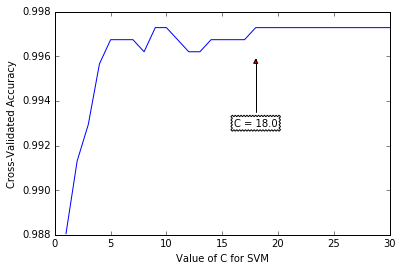

('prediction is', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

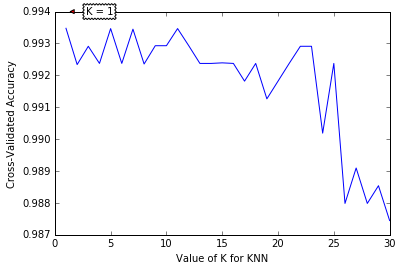

('prediction is', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

/home/sheng/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sheng/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sheng/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sheng/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWar

In [11]:
### compare with SVM, HMM, KNN

import sys
import numpy as np
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from scipy.stats import sem
import pandas as pd
from collections import Iterable
import hmmlearn.hmm
import matplotlib.pyplot as plt



def train_svm(features_train,labels_train, svm_best_parameter,filename):

    clf = svm.SVC(C = svm_best_parameter,  probability = True)
    clf.fit(features_train,labels_train)
    joblib.dump(clf, filename)

def train_knn(features_train,labels_train, knn_best_parameter,filename):
    knn = KNeighborsClassifier(n_neighbors = knn_best_parameter)
    knn.fit(features_train,labels_train)
    joblib.dump(knn, filename)

def train_hmm(startprob, transmat, means, cov,filename):
    hmm = hmmlearn.hmm.GaussianHMM(startprob.shape[0], "diag")            # hmm training

    hmm.startprob_ = startprob
    hmm.transmat_ = transmat
    hmm.means_ = means
    hmm.covars_ = cov

    joblib.dump(hmm, filename)


def get_hmm_parameter(features,labels):
    uLabel = np.unique(labels)
    #print uLable
    nComps = len(uLabel)

    nFeatures = features.shape[1]
    #print nFeatures
    if features.shape[0] < labels.shape[0]:
        print "trainHMM warning: number of short-term feature vectors must be greater or equal to the labels length!"
        labels = labels[0:features.shape[1]]

    # compute prior probabilities:
    startprob = np.zeros((nComps,))
    for i, u in enumerate(uLabel):
        startprob[i] = np.count_nonzero(labels == u)
    startprob = startprob / startprob.sum()                # normalize prior probabilities
#     print ("start probobility is",startprob)

    # compute transition matrix:
    transmat = np.zeros((nComps, nComps))
    print labels.shape
    for i in range(labels.shape[0]-1):
        transmat[int((labels.T)[i]), int((labels.T)[i + 1])] += 1
    for i in range(nComps):                     # normalize rows of transition matrix:
        transmat[i, :] /= transmat[i, :].sum()
#     print ("transfer matrix is",transmat)

    means = np.zeros((nComps, nFeatures))
    for i in range(nComps):
        temp_label = np.nonzero(labels == uLabel[i])[0]
        means[i, :] = np.matrix(features[np.nonzero(labels == uLabel[i])[0],:].T.mean(axis=1))
        #print("#####################")

#     print ("means is",means)


    cov = np.zeros((nComps, nFeatures))
    for i in range(nComps):
        #cov[i,:,:] = numpy.cov(features[:,numpy.nonzero(labels==uLabels[i])[0]])  # use this lines if HMM using full gaussian distributions are to be used!
        cov[i, :] = np.std(features[np.nonzero(labels == uLabel[i])[0],:].T, axis=1)

#     print ("cov is",cov)
    return startprob, transmat, means, cov


def train_evaluate_cross_validation_svm(features,labels):
    classifierParams = np.linspace(1,30,30)
#     print classifierParams
    accuracy = []
    for c,ci in enumerate(classifierParams):                # for each param value
# 	print ci
        classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C = ci))
        scores = cross_validation.cross_val_score(classifier_pipeline, features, labels, cv=50,scoring='accuracy')
#         print scores
#         print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))
        accuracy.append(np.mean(scores))

    best_accuracy_index = np.argmax(accuracy)
    print ("all accuracies are",accuracy)
#     print ("best parameter index of C is ",best_accuracy_index)
    print ("best parameter C is ",classifierParams[best_accuracy_index])

    plt.plot(classifierParams, accuracy)
    plt.xlabel('Value of C for SVM')
    plt.ylabel('Cross-Validated Accuracy')
    ax = plt.axes()
    ann = ax.annotate(u"C = 18.0",xy=(18.0,0.996), xytext=(18,0.993),size=10, va="center",ha="center", bbox=dict(boxstyle='sawtooth',fc="w"), arrowprops=dict(arrowstyle="-|>", connectionstyle="angle,rad=0.4",fc='r') )
    plt.show()
    return classifierParams[best_accuracy_index]


def train_evaluate_cross_validation_knn(features,labels):
    k_range = range(1,  31)
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        #print len(features_normalization)
        #print len(lable[0])
        #features_train, features_test, lable_train, lable_test = train_test_split(features_normalization, lable[0], test_size = 0.2, random_state=0)
        classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), knn)
        scores = cross_validation.cross_val_score(classifier_pipeline, features, labels, cv=30,scoring='accuracy')
#         print scores
#         print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))
        k_scores.append(scores.mean())
    print ("all k scores are",k_scores)
    best_k_scores_index = np.argmax(k_scores)
#     print ("best K index is ",best_k_scores_index)
    print ("best parameter K is ",k_range[best_k_scores_index])

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    ax = plt.axes()
    ann = ax.annotate(u"K = 1",xy=(1.1,0.994), xytext=(4,0.994),size=10, va="center",ha="center", bbox=dict(boxstyle='sawtooth',fc="w"), arrowprops=dict(arrowstyle="-|>", connectionstyle="angle,rad=0.4",fc='r') )

    plt.show()

    return k_range[best_k_scores_index]


def prediction(features_test,labels_test,model_prediction):



#     print ("features test are ",features_test)
    predictions = np.array([])

    # load the model from disk
    clf = joblib.load(model_prediction)

    for i in range(features_test.shape[0]):
        # X_test = scalingFactor.transform(featureMatrix[i, :])
        X_test = [features_test[i,:]]
#         print("x test is", X_test)
        predictions = np.append(predictions, clf.predict(X_test))
        #print predictions
    print("prediction is",predictions)

    print("y_test is",labels_test)
    print ("Classification Report:")
    print (metrics.classification_report(labels_test, predictions))
    print ("Confusion Matrix:")
    print(metrics.confusion_matrix(labels_test, predictions))




if __name__ == '__main__':
    features = np.loadtxt("feature/train_features_mfcc.txt")
    labels = np.loadtxt("feature/train_label_mfcc.txt")

#     print ("features are ",features)
#     print ("labels are ",labels)
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=0)

    svm_best_parameter = train_evaluate_cross_validation_svm(features,labels)
    filename = 'model/model_svm.sav'
    train_svm(features_train,labels_train, svm_best_parameter,filename)
    model_prediction = 'model/model_svm.sav'
    prediction(features_test,labels_test,model_prediction)



    knn_best_parameter = train_evaluate_cross_validation_knn(features,labels)
    filename = 'model/model_knn.sav'
    train_knn(features_train,labels_train, knn_best_parameter,filename)
    model_prediction = 'model/model_knn.sav'
    prediction(features_test,labels_test,model_prediction)

    
    startprob, transmat, means, cov = get_hmm_parameter(features_train,labels_train)
    filename = 'model/model_hmm.sav'
    train_hmm(startprob, transmat, means, cov,filename)
    model_prediction = 'model/model_hmm.sav'
    prediction(features_test,labels_test,model_prediction)
